In [1]:
import pandas as pd
import functools
import numpy as np
from tqdm import tqdm
import os
from multiprocessing.pool import Pool
from scipy import stats
import seaborn as sns


In [2]:
submission_file = 'data/final_submission_borda.csv'
percent_limit   = 0.4
submission_size = 10

In [3]:
df_item = pd.read_csv("/media/workspace/triplet_session/output/mercado_livre/dataset/item__processed.csv", usecols=["item_id", "domain_id", "domain_idx"])#.head(10)
df_item.head()

,domain_id,item_id,domain_idx
0,MLM-INDIVIDUAL_HOUSES_FOR_SALE,111260,6107
1,MLM-VIDEO_GAMES,871377,7754
2,MLM-SKIRTS,490232,7275
3,MLM-GRAPHICS_CARDS,1150706,5892
4,MLM-NOTEBOOKS,934912,6707


In [4]:
domain_map = df_item[['item_id', 'domain_idx']].set_index("item_id").to_dict()["domain_idx"]
#domain_map

In [5]:
df_sub = pd.read_csv(submission_file, header=None)
df_sub.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1572239,1717880,1379001,1909436,289641,656719,1870843,992938,221918,1987572,...,776822,2079860,57337,679654,2051453,98388,316253,1967678,86082,1955187
1,849692,1506643,108992,181478,1007213,1676401,389079,1146634,1175381,1439106,...,900324,243028,1733260,73232,864577,1613261,1386287,570711,1688227,819289
2,1796243,1930193,444075,2825,1748431,716822,459697,1283004,429798,1859462,...,1295065,1251230,1229153,795201,950023,1570117,913832,1726091,1753180,1666130
3,1587422,725371,1880554,358952,290755,1082484,86082,1716388,10243,2053790,...,824954,1343601,2043569,1027487,1748830,922608,1303554,830693,1127740,1271457
4,1332849,1748830,1314932,1082484,10243,1459575,1803710,358952,290755,1647194,...,772852,1087305,1978430,656719,660825,1646209,1843848,822392,1714579,1399074


In [6]:
df_sub.values

array([[1572239, 1717880, 1379001, ..., 1967678,   86082, 1955187],
       [ 849692, 1506643,  108992, ...,  570711, 1688227,  819289],
       [1796243, 1930193,  444075, ..., 1726091, 1753180, 1666130],
       ...,
       [1576126,  136713, 1496958, ...,  108511,  577011, 1828798],
       [1587422,  849156,  725371, ..., 2021710,  455802,   21739],
       [ 992938, 1459575, 1439187, ...,  293575,  671264, 1820707]])

In [7]:
def _get_domain(arr, domain_map):
    return list(map(domain_map.get, arr))
    
with Pool(os.cpu_count()) as p:
    _map_domain = list(tqdm(
        p.map(functools.partial(_get_domain, domain_map=domain_map), df_sub.values),
        total=len(df_sub.values),
    ))  
    
_map_domain    

100%|██████████| 177070/177070 [00:00<00:00, 4729697.05it/s]


[[2015,
  2015,
  3630,
  3630,
  3630,
  3776,
  3630,
  3630,
  3630,
  3630,
  2015,
  3630,
  3630,
  3630,
  3630,
  3630,
  2015,
  3630,
  2015,
  3340,
  3630,
  3630,
  2015,
  4975,
  2027,
  3630,
  3257,
  3630,
  3630,
  2462,
  536,
  3630,
  2015,
  3630,
  3355,
  2874,
  3630,
  2938,
  2015,
  3671,
  2295,
  2015,
  158,
  3472,
  2075,
  3630,
  3257,
  4040,
  3992,
  2193,
  3630,
  1467,
  431,
  3630,
  1486,
  2015,
  1908,
  2015,
  3630,
  1966,
  24,
  462,
  3840,
  5999,
  3149,
  1498,
  3341,
  1113,
  1991,
  3630,
  2462,
  3630,
  2939,
  3964,
  888,
  888,
  3630,
  3630,
  3513,
  859,
  2018,
  1909,
  2846,
  3341,
  694,
  3630,
  3524,
  3341,
  3355,
  3661,
  462,
  3355,
  888,
  890,
  975,
  6414,
  4004,
  1958,
  2027,
  3524],
 [2823,
  2823,
  888,
  2462,
  1966,
  1966,
  13,
  694,
  3957,
  2462,
  3165,
  206,
  2462,
  1781,
  2462,
  3957,
  2459,
  3376,
  1966,
  507,
  857,
  3524,
  3671,
  815,
  888,
  680,
  2027,
  3359,

In [8]:
def _get_moda(arr):
    return stats.mode(arr[:10])[0][0]

def _get_count_moda(arr):
    return stats.mode(arr[:10])[1][0]/len(arr[:10])

In [9]:
arr_moda = list(zip(list(df_sub.values), list(_map_domain),  
                    list(map(_get_moda, _map_domain)), 
                    list(map(_get_count_moda, _map_domain))))
#arr_moda

In [10]:
df_moda = pd.DataFrame(arr_moda, columns=["reclist", "domainlist", "domain_moda", "count"])
df_moda.head()

,reclist,domainlist,domain_moda,count
0,"[1572239, 1717880, 1379001, 1909436, 289641, 6...","[2015, 2015, 3630, 3630, 3630, 3776, 3630, 363...",3630,0.7
1,"[849692, 1506643, 108992, 181478, 1007213, 167...","[2823, 2823, 888, 2462, 1966, 1966, 13, 694, 3...",1966,0.2
2,"[1796243, 1930193, 444075, 2825, 1748431, 7168...","[5411, 5999, 5011, 7373, 7760, 5999, 5999, 481...",5999,0.5
3,"[1587422, 725371, 1880554, 358952, 290755, 108...","[2027, 3513, 678, 2483, 815, 4195, 2027, 3776,...",2027,0.2
4,"[1332849, 1748830, 1314932, 1082484, 10243, 14...","[888, 3513, 3957, 4195, 1338, 3776, 1338, 2483...",1338,0.2


In [11]:
def _create_relevance_list(sorted_actions, expected_action):
    s = []
    for i in range(len(sorted_actions)):
        if str(sorted_actions[i]) == str(expected_action):
            s.append(i + 0)
        else:
            s.append(i + 100)
    return s
    #return [0 if str(action) == str(expected_action) else 1 for action in sorted_actions]

df_moda['relevance_list'] = df_moda.apply(lambda row: 
                                          _create_relevance_list(row['domainlist'], row['domain_moda']),  
                                          axis=1)

In [12]:
df_moda.head()

,reclist,domainlist,domain_moda,count,relevance_list
0,"[1572239, 1717880, 1379001, 1909436, 289641, 6...","[2015, 2015, 3630, 3630, 3630, 3776, 3630, 363...",3630,0.7,"[100, 101, 2, 3, 4, 105, 6, 7, 8, 9, 110, 11, ..."
1,"[849692, 1506643, 108992, 181478, 1007213, 167...","[2823, 2823, 888, 2462, 1966, 1966, 13, 694, 3...",1966,0.2,"[100, 101, 102, 103, 4, 5, 106, 107, 108, 109,..."
2,"[1796243, 1930193, 444075, 2825, 1748431, 7168...","[5411, 5999, 5011, 7373, 7760, 5999, 5999, 481...",5999,0.5,"[100, 1, 102, 103, 104, 5, 6, 107, 8, 9, 110, ..."
3,"[1587422, 725371, 1880554, 358952, 290755, 108...","[2027, 3513, 678, 2483, 815, 4195, 2027, 3776,...",2027,0.2,"[0, 101, 102, 103, 104, 105, 6, 107, 108, 109,..."
4,"[1332849, 1748830, 1314932, 1082484, 10243, 14...","[888, 3513, 3957, 4195, 1338, 3776, 1338, 2483...",1338,0.2,"[100, 101, 102, 103, 4, 105, 6, 107, 108, 109,..."


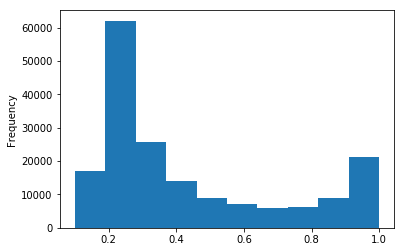

In [13]:
df_moda['count'].plot(kind='hist')

In [14]:
def _sorte_by_domain_moda(reclist, relevance_list, percent, limit):
    if percent >= limit:
        return [x for _,x in sorted(zip(relevance_list, reclist), reverse=False)]
    else:
        return reclist
    
df_moda['reclist_2'] = df_moda.apply(lambda row: _sorte_by_domain_moda(
                                                row['reclist'], 
                                                row['relevance_list'], 
                                                row['count'], percent_limit)[:submission_size],  axis=1)    
df_moda['domainlist_2'] = df_moda.apply(lambda row: _sorte_by_domain_moda(
                                                row['domainlist'], 
                                                row['relevance_list'], 
                                                row['count'], percent_limit)[:submission_size],  axis=1)  

In [15]:
df_moda.head()

,reclist,domainlist,domain_moda,count,relevance_list,reclist_2,domainlist_2
0,"[1572239, 1717880, 1379001, 1909436, 289641, 6...","[2015, 2015, 3630, 3630, 3630, 3776, 3630, 363...",3630,0.7,"[100, 101, 2, 3, 4, 105, 6, 7, 8, 9, 110, 11, ...","[1379001, 1909436, 289641, 1870843, 992938, 22...","[3630, 3630, 3630, 3630, 3630, 3630, 3630, 363..."
1,"[849692, 1506643, 108992, 181478, 1007213, 167...","[2823, 2823, 888, 2462, 1966, 1966, 13, 694, 3...",1966,0.2,"[100, 101, 102, 103, 4, 5, 106, 107, 108, 109,...","[849692, 1506643, 108992, 181478, 1007213, 167...","[2823, 2823, 888, 2462, 1966, 1966, 13, 694, 3..."
2,"[1796243, 1930193, 444075, 2825, 1748431, 7168...","[5411, 5999, 5011, 7373, 7760, 5999, 5999, 481...",5999,0.5,"[100, 1, 102, 103, 104, 5, 6, 107, 8, 9, 110, ...","[1930193, 716822, 459697, 429798, 1859462, 127...","[5999, 5999, 5999, 5999, 5999, 5999, 5999, 599..."
3,"[1587422, 725371, 1880554, 358952, 290755, 108...","[2027, 3513, 678, 2483, 815, 4195, 2027, 3776,...",2027,0.2,"[0, 101, 102, 103, 104, 105, 6, 107, 108, 109,...","[1587422, 725371, 1880554, 358952, 290755, 108...","[2027, 3513, 678, 2483, 815, 4195, 2027, 3776,..."
4,"[1332849, 1748830, 1314932, 1082484, 10243, 14...","[888, 3513, 3957, 4195, 1338, 3776, 1338, 2483...",1338,0.2,"[100, 101, 102, 103, 4, 105, 6, 107, 108, 109,...","[1332849, 1748830, 1314932, 1082484, 10243, 14...","[888, 3513, 3957, 4195, 1338, 3776, 1338, 2483..."


In [16]:
df_moda.iloc[2]

reclist           [1796243, 1930193, 444075, 2825, 1748431, 7168...
domainlist        [5411, 5999, 5011, 7373, 7760, 5999, 5999, 481...
domain_moda                                                    5999
count                                                           0.5
relevance_list    [100, 1, 102, 103, 104, 5, 6, 107, 8, 9, 110, ...
reclist_2         [1930193, 716822, 459697, 429798, 1859462, 127...
domainlist_2      [5999, 5999, 5999, 5999, 5999, 5999, 5999, 599...
Name: 2, dtype: object

In [17]:
df_moda.iloc[2].reclist

array([1796243, 1930193,  444075,    2825, 1748431,  716822,  459697,
       1283004,  429798, 1859462,  928822,  602671, 1330189, 1767506,
          6112, 1937259,  795217,  326171, 1654019, 1984808,  846057,
        481109,  780065,  780603, 1276232, 1410858, 1799758,  842535,
        255638, 2054441, 2041271, 1993912,  805199,  363435, 1123250,
       1139737, 1586488,  286452, 2048981, 1777682, 1303554,  642990,
        862538,   33757,  667152, 1905042, 1095764, 1565107, 1921763,
        298902,  282882, 1344729, 1088595,  474383, 1058918, 1113459,
       1471401,  155343,  388604, 1197882,  876400,  568391, 1502890,
       2015738, 1179429, 1978272, 1978936, 1190892, 1773428, 1755800,
       1352725,  622653, 2090659, 1483688, 1714590, 1462303,  759459,
       1328997,  877855, 1970210, 1787501, 1103704,  340792,  517173,
       1056275, 1803298, 1188108, 1518529, 1322763,  525139, 1295065,
       1251230, 1229153,  795201,  950023, 1570117,  913832, 1726091,
       1753180, 1666

In [18]:
#df_moda.iloc[2].domainlist

In [19]:
reranked_list = list(df_moda.reclist_2.values)
np.savetxt('data/final_submission_domain_{}.csv'.format(percent_limit), reranked_list, fmt='%i', delimiter=',') 